In [125]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix
import matplotlib
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

<h2>Load source data</h2>

In [126]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

duplicate_count = str(np.sum(np.array(data.duplicated())))
print("Duplicate data count: " + duplicate_count)

# Dropping duplicates makes accuracy worse
# data = data.drop_duplicates()
# duplicate_count = str(np.sum(np.array(data.duplicated())))
# print("Duplicate data count: " + duplicate_count)

Duplicate data count: 240


In [127]:
X = data.drop('quality', axis=1)
y = data.quality
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))


X shape: (1599, 11)
y shape: (1599,)


<h2>Train / test split</h2>

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X train shape: ' + str(X_train.shape))
print('X test shape: ' + str(X_test.shape))

X train shape: (1279, 11)
X test shape: (320, 11)


In [129]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
638,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2
630,8.7,0.540,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3
764,9.1,0.680,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5
1068,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6


In [130]:
y_train.head(5)

638     7
630     6
764     6
1068    7
1335    6
Name: quality, dtype: int64

<h2>Let's normalise and standardise the data</h2>

In [131]:
X_train_scaled = preprocessing.scale(X_train)
X_train_normalised = preprocessing.normalize(X_train)

print(X_train_scaled)

[[ -3.52906720e-01   2.14953307e+00  -7.76397069e-01 ...,   2.58867609e-01
   -5.01692129e-02  -2.11814186e-01]
 [  2.20331399e-01   6.73757247e-02  -5.87177588e-02 ...,  -2.64184006e-01
   -3.37653189e-01  -1.05728368e+00]
 [  4.49626646e-01   8.44714466e-01  -8.27659876e-01 ...,  -2.65819820e-03
   -6.25137164e-01  -8.69401568e-01]
 ..., 
 [  9.08217141e-01  -1.54721059e-01  -1.61243374e-01 ...,   1.93486157e-01
   -7.97627550e-01  -3.99696295e-01]
 [ -1.80935284e-01  -1.93149533e+00   5.05173127e-01 ...,  -2.74867918e+00
   -1.25760191e+00   2.13671218e+00]
 [ -8.11497214e-01  -9.32059800e-01  -1.09980567e-01 ...,   6.51156321e-01
   -3.37653189e-01  -3.05755241e-01]]


<h2>Linear regression</h2>

In [132]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.coef_)
print(lr_model.intercept_)

[  4.48232017e-02  -1.29059343e+00  -3.03586705e-01   1.37934741e-02
  -1.88509077e+00   4.54485291e-03  -3.11743378e-03  -2.32351798e+01
  -3.35312393e-01   8.94174371e-01   2.67072758e-01]
27.1210374543


In [146]:
y_pred = lr_model.predict(X_test)
print(y_pred)

[ 5.10887301  6.0000129   4.66316725  5.17907698  6.03614408  5.02247308
  5.8773368   5.59036782  5.24406257  6.00739204  5.74055515  6.4103665
  6.68622313  6.12882168  5.30915267  4.86457761  6.2893808   5.94887116
  5.45513672  5.83335533  4.80368935  5.28298919  5.84019356  6.19246416
  5.25544838  5.99580442  4.97065227  5.48375576  5.07057172  5.55696563
  5.77392776  5.7086194   6.46613602  5.53083957  5.19586733  6.13371084
  5.01820222  5.10023522  6.09391691  5.27065309  6.10020332  6.15361112
  5.33189344  5.99180545  5.31834922  6.24149913  5.05146924  5.714612
  5.50702952  5.03927739  6.23785216  6.21781432  6.41389777  6.20175227
  5.21650989  5.22055359  5.56180908  5.46483144  5.03211016  6.61042947
  5.73276655  5.79924452  4.42949622  5.19081376  6.42389451  5.78814121
  5.14389067  5.9081007   6.19585999  5.42802325  6.39664773  6.12521883
  5.10688049  5.84537297  5.73727736  5.75436239  5.58209183  5.1840734
  5.21425986  5.17907698  6.10482604  6.13176247  5.326

In [148]:
y_pred_int = [int(i) for i in y_pred]

print('Accuracy: ', np.mean(y_pred_int == y_test))
print('Mean square error: ', mean_squared_error(y_pred, y_test))

Accuracy:  0.475
Mean square error:  0.432544396636


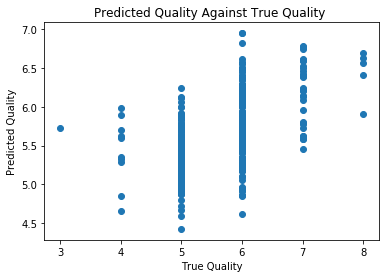

In [149]:
import matplotlib.pylab as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

## Decision tree classifier

In [150]:
dtc_model = tree.DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [151]:
confidence = dtc_model.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.653125


In [152]:
y_pred = dtc_model.predict(X_test)

In [153]:
print(y_pred)

[5 6 5 6 6 5 6 6 5 6 5 7 6 5 5 5 6 6 5 5 5 6 6 6 6 6 6 5 5 6 5 5 6 6 5 7 5
 4 8 5 6 6 5 6 5 6 5 6 4 5 7 6 6 5 5 5 5 5 6 6 5 6 5 5 7 6 5 5 5 6 8 6 6 6
 6 6 6 6 7 6 6 7 6 3 5 7 6 6 5 6 5 7 6 7 5 5 5 6 5 5 6 5 6 5 5 6 5 6 7 6 5
 5 6 5 6 6 6 7 5 7 5 6 6 6 5 6 7 7 6 5 6 6 5 6 7 6 5 6 3 6 6 6 6 5 5 6 6 5
 7 6 6 5 5 6 6 6 6 6 6 6 5 5 6 5 6 6 6 5 7 7 6 5 6 5 5 7 5 6 6 6 6 4 4 6 5
 6 5 6 5 6 5 5 5 5 5 5 6 6 4 5 6 6 6 6 5 5 5 5 5 5 7 5 6 5 6 5 5 6 5 7 5 6
 6 5 5 5 6 5 6 6 7 6 5 6 5 5 5 6 5 5 6 5 7 7 5 5 5 5 5 5 5 5 6 5 7 6 5 5 7
 5 5 6 6 5 6 5 6 4 5 7 5 6 5 5 6 6 6 6 7 6 6 5 5 6 6 6 7 5 5 7 5 5 5 6 6 4
 5 4 6 6 6 6 7 6 6 6 6 6 6 5 7 5 6 6 5 6 7 5 5 6]


In [154]:
print(y_test.values)

[5 5 4 6 6 5 6 5 6 6 5 8 8 5 5 6 6 6 7 6 5 6 6 6 6 6 6 6 5 5 7 5 6 5 6 7 5
 6 6 6 6 6 5 5 5 6 5 6 6 5 6 7 6 7 5 5 5 6 5 6 5 6 5 5 7 5 5 5 6 6 7 6 5 5
 6 6 7 6 5 6 6 7 4 5 5 7 6 7 6 5 5 6 5 5 4 5 5 6 5 5 4 5 6 5 5 6 6 5 7 6 5
 5 7 5 3 5 6 6 5 7 6 5 6 6 6 6 7 6 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 6 6
 6 6 5 7 5 4 5 5 8 6 6 6 5 5 6 5 6 6 7 5 5 5 6 6 4 5 5 6 6 5 7 6 6 6 5 6 5
 5 5 5 5 6 5 7 5 5 5 5 6 6 4 5 6 5 6 6 5 5 6 6 5 5 7 5 6 5 6 5 5 5 5 7 5 6
 6 5 5 6 6 5 6 6 6 4 6 6 6 6 5 6 6 5 7 5 6 7 5 6 5 5 6 5 5 5 6 5 7 6 5 5 8
 5 5 6 5 7 6 7 6 4 6 7 5 4 5 5 6 6 6 5 6 6 6 5 5 6 6 5 8 5 6 7 5 5 6 6 6 6
 5 5 6 6 6 6 7 6 5 7 5 6 7 5 7 5 6 6 5 6 6 6 5 5]


## SVM

In [155]:
lsvc_model = svm.LinearSVC()
lsvc_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [156]:
y_pred = lsvc_model.predict(X_test)
print(y_pred)

[5 6 5 5 6 5 6 5 5 6 6 6 6 6 5 5 6 6 6 6 5 5 6 6 5 6 5 5 5 6 5 6 6 6 5 6 5
 5 6 5 6 6 5 6 5 6 5 5 6 5 6 6 6 6 5 5 5 5 5 6 6 6 5 5 6 6 5 6 6 5 6 5 5 6
 6 5 6 5 5 5 6 6 5 5 5 6 6 6 5 5 5 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 6 5 6 6 5
 5 6 5 6 5 6 6 6 6 5 5 5 5 5 5 6 6 6 5 5 5 5 6 6 6 6 6 5 6 6 6 6 5 5 5 6 5
 6 6 5 6 6 5 6 5 6 6 5 6 5 5 6 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 6 5 5 5 5 6 5
 6 5 5 6 6 5 6 5 5 6 5 6 5 5 5 6 6 6 6 5 5 5 5 5 5 6 5 6 5 6 5 5 5 5 6 6 6
 5 5 5 5 6 5 5 6 6 5 6 6 6 6 5 6 5 5 6 6 6 6 5 5 5 5 5 5 5 5 6 5 6 6 6 5 6
 5 6 6 6 6 6 6 5 6 5 6 6 5 6 5 6 6 6 5 6 6 6 5 5 6 6 5 5 5 5 6 5 5 5 5 6 6
 6 6 6 6 6 5 6 6 5 6 5 5 6 6 6 5 5 6 6 5 6 6 6 5]


In [157]:
print('Accuracy: ', np.mean(y_pred == y_test))
print('Mean square error: ', mean_squared_error(y_pred, y_test))

Accuracy:  0.575
Mean square error:  0.55
